In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.linalg as spla
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Линейная регрессия 
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'></a>
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#linreg'>Модель линейной регрессии</a></li>
<li><a href='#overfitting'>Эффект переобучения</a></li>
<li><a href='#example1'>Пример 1. Построение линии регрессии "дата"-"температура" </a></li>
<li><a href='#example2'>Пример 2: </a></li>
<li><a href='#links'>Ссылки</a></li>
<li><a href='#hometask'>Задание для самостоятельной работы</a></li>    
</ol>

# Введение <a name='intro'></a>

Задача регрессии (предсказания) относится к типовым задачам машинного обучения с учителем. Задача заключается в том, чтобы научиться предсказывать значения целевой (объясняемой) переменной на основе знаний о значениях этой переменной при заданных значениях признаков (объясняющих переменных). Данная задача весьма часто встречается на практике.

<a href='#toc'>Назад к Оглавлению</a>

# Модель линейной регрессии <a name='linreg'></a>

Линейная регрессия (Linear regression) — модель зависимости целевой (объясняемой) переменной от одной или нескольких других независимых (объясняющих) переменных (которые называются факторами или регрессорами) с использованием линейной функции $\vec{y}=A\vec{x}+\vec{B}$, где $\vec{y}$ - вектор целевых значений, $A$ - матрица весов для имеющихся значений признаков, $\vec{B}$ - вектор значений смещений, $\vec{x}$ - имеющиеся значения признаков.

Матрица $A$ имеет размерность $m$ на $n$, где $m$ - количество признаков, $n$ - количество наблюдений признаков.

Например, зависимость

$$
РОСТ = A \cdot ВЕС + B
$$

линейно связывает рост и вес человека, позволяя по значению веса предположить значение роста, для этого определяется константа (коэффициент, вес) $a$ и смещение $b$.

Пример более сложной зависимости:

$$
ЦЕНА = A \cdot КАЧЕСТВО + B \cdot ВРЕМЯ + C \cdot ЗАТРАТЫ + D
$$


Также более сложные зависимости можно строить с помощью конструирования новых признаков с использованием существующих (рассматривая, например, степени известных признаков):

$$
y(x)=a x^2 + b x + c,
$$

в которой объясняющими переменными (признаками)  являются $x$ и $x^2$, а искомых коэффициентов три: $a$, $b$ и $c$.

В примере ниже показано приближение множества точек моделью $y(x) = Ax + B$ (линейная зависимость, один признак $x$) и моделью $y(x)=Ax^2 + Bx + C$ (квадратичная зависимость, два признака $x^2$ и $x$).

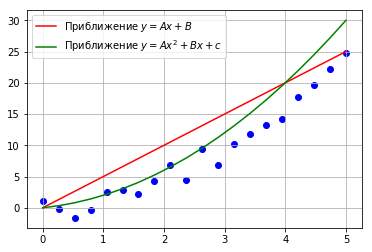

In [2]:
xs = np.linspace(0, 5, 20)
ys = xs**2 + np.random.randn(20)
plt.scatter(xs, ys, c='b')
plt.plot(xs, 5*xs, c='r', label='Приближение $y=Ax+B$')
plt.plot(xs, xs**2+xs, c='g', label='Приближение $y=Ax^2+Bx+c$')
plt.grid(True)
plt.legend()
plt.show()

В общем случае, если задан вектор признаков $\vec{x}=(x_1, \cdots, x_n)$ и вектор весов $\vec{w}=(w_0, w_1, \cdots, w_n)$, то их линейной комбинацией является выражение

$$
y = w_0 + x_1 w_1 + \cdots + w_n x_n,
$$

или, при добавлении единицы в вектор признаков $\vec{x}=(1, x_1, \cdots, x_n)$ в более коротком виде
$$
y=w^T x.
$$

В самом простом случае (одна объясняющая переменная, один признак) модель линейной регрессии представляет собой линейную функцию $y(x)=Ax+b$. Графически это означает, что мы пытаемся построить прямую линию $y(x) = Ax+B$, которая проходит "как можно ближе" к таблично заданным точкам $(x_1,y_1), \cdots,(x_n,y_n)$.

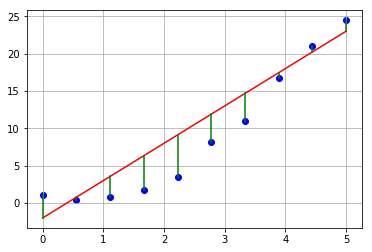

In [3]:
xs = np.linspace(0, 5, 10)
ys = xs**2 + np.random.randn(10)
plt.scatter(xs, ys, c='b')
plt.plot(xs, 5*xs-2, c='r')
for x, y in zip(xs, ys):
    plt.plot([x,x], [5*x-2,y], c='g')
plt.grid(True)
plt.show()

Параметр, характеризующий ошибку модели, очевидно связан с длинной зеленых отрезков на рисунке (т.е. расстояний между известными заданными точками $y_i$ и значениями, предсказанными моделью $Ax_i+B$).

Поэтому в качестве меры ошибки берется сумма среднеквадратичных отклонений, для наиболее оптимальной модели эта мера должна быть минимальна $$F(A,B)=\sqrt{\sum_{i=1}^{n}{\left[ Ax_i + B -y_i\right]^2}}\to \min$$

Решение этой задачи оптимизации можно получить в виде точной формулы. Для этого используется тот факт, что экстремум (минимум) достигается в точке, в которой частные производные целевой функции $F(A,B)$ равны нулю: 
$$
\frac{\partial F(A,B)}{\partial A}=0,~\frac{\partial F(A,B)}{\partial B}=0.
$$
Из этих двух уравнений получается система линейных уравнений для нахождения коэффициентов $A$ и $B$:
$$
A \cdot n + B \cdot \sum_{i=1}^{n}{x_i}=\sum_{i=1}^{n}{y_i}
$$
$$
A \sum_{i=1}^{n}{x_i} + B \cdot \sum_{i=1}^{n}{x_i ^2}=\sum_{i=1}^{n}{x_i y_i}.
$$

Из этой системы в явном виде находятся коэффициенты регрессии $A$ и $B$, что и дает решение задачи. Однако у такого подхода есть существенный минус - при решении СЛАУ методом Крамера или методом обратной матрицы необходимо вычислять определитель, что неэффективно для очень больших матриц (когда много признаков) или для матриц, определитель которых близок к нулю.

Поэтому в большинстве практических задач более эффективными являются приближенные численные методы, которые позволяют найти решение с заданной точностью с меньшими ресурсами (например, градиентный метод).

<a href='#toc'>Назад к Оглавлению</a>

# Переобучение и регуляризация <a name='overfitting'></a>

In [60]:
def f(x):
    r = []
    for elem in x:
        r.append(round(elem,2))
    return(r)

xs = np.sort(f(10*np.random.random(25)))
ys = xs**2 + np.random.randn(25)*10

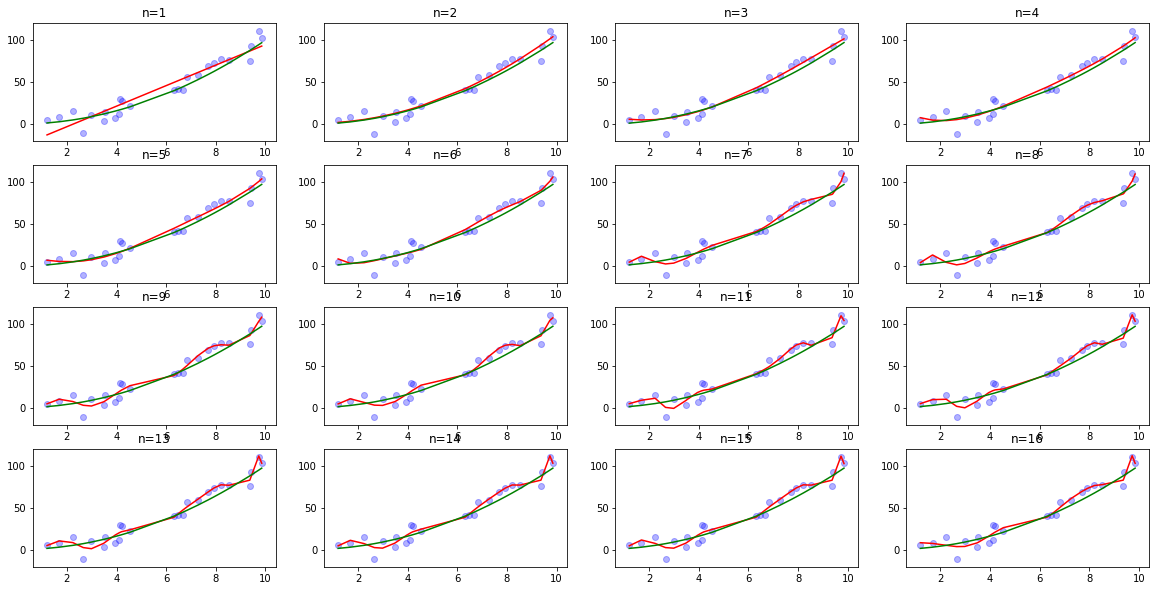

In [71]:
fig, ax = plt.subplots(4, 4, figsize=(20,10))
for pos, degree in enumerate(range(1,17)):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xs.reshape(-1,1), ys)
    result = model.predict(xs.reshape(-1,1))
    ax[pos//4][pos%4].plot(xs, result, c='r')
    ax[pos//4][pos%4].plot(xs, xs**2, c='g')
    ax[pos//4][pos%4].scatter(xs, ys, c='b', alpha=0.3)
    ax[pos//4][pos%4].set_title("n={}".format(degree))

In [67]:
model = make_pipeline(PolynomialFeatures(50), LinearRegression())
model.fit(xs.reshape(-1,1), ys)
model.score(xs.reshape(-1,1), ys)

0.7835484591383971

Регуляризация используется для борьбы с переобучением. При $L_2$-регуляризации минимизируется функция:

$$
M(X, \vec{y}, \vec{w}) = L (X, \vec{y}, \vec{w}) + \lambda |\vec{w}|^2
$$


In [68]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

<a href='#toc'>Назад к Оглавлению</a>

# Пример 1. Построение линии регрессии "дата"-"температура" <a name='example1'></a>

Зададим массив значений $ts$ (значение переменной времени, моменты измерений) и $Ts$ (температура).

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Время,0.000000,0.714286,1.428571,2.142857,2.857143,3.571429,4.285714,5.000000,5.714286,6.428571,7.142857,7.857143,8.571429,9.285714,10.000000
Температура,-0.352288,1.669163,1.658452,0.640946,3.575863,4.828000,4.698122,6.144712,3.487708,6.206962,6.997603,6.973559,9.426913,10.908711,9.161227


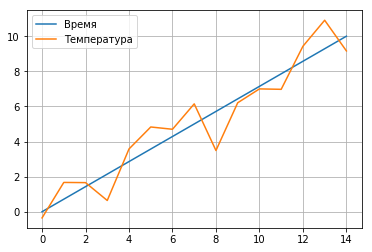

In [6]:
ts = np.linspace(0, 10, 15)
Ts = ts + np.random.randn(15)
df = pd.DataFrame({"Время": ts, "Температура": Ts})
display(df.T)
df.plot()
plt.grid(True)
plt.show()

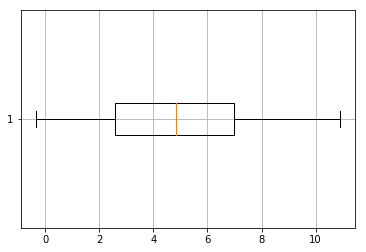

In [7]:
plt.boxplot(df.Температура, vert=False)
plt.grid(True)
plt.show()

Отобразим точки

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


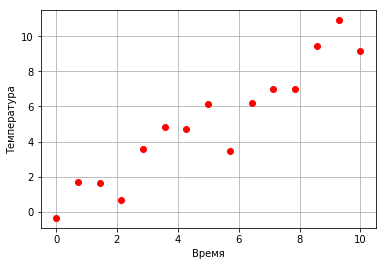

In [8]:
plt.plot(df['Время'], df['Температура'], 'ro')
plt.xlabel("Время")
plt.ylabel("Температура")
plt.grid(True)
plt.show()

Будем искать приближение в виде линейной функции $y(x)=Ax+b$.

Как рассмотрено выше, для нахождения коэффициентов $A$ и $B$ решаем систему линейных уравнений:
$$
A \cdot n + B \cdot \sum_{i=1}^{n}{x_i}=\sum_{i=1}^{n}{y_i}
$$
$$
A \sum_{i=1}^{n}{x_i} + B \cdot \sum_{i=1}^{n}{x_i ^2}=\sum_{i=1}^{n}{x_i y_i}.
$$

Решим СЛАУ методом обратной матрицы

In [9]:
xs = df.Время
ys = df.Температура
M = np.matrix([[len(xs), sum(xs)], [sum(xs), sum([i**2 for i in xs])]])
N = np.array([sum(ys), np.dot(xs, ys)])
#import scipy.linalg as spla
invM = spla.inv(M)
S = np.dot(N, invM)
print("Коэффициент A: {}, коэффициент B:{}.".format(round(S[1], 2), round(S[0], 2)))

Коэффициент A: 0.99, коэффициент B:0.12.


Построим график функции $y(x)=Ax+B$ совместно с заданными точками.
Также построим предсказываемое значение для $Ж=15$ (желтый ромб в правом верхнем углу).

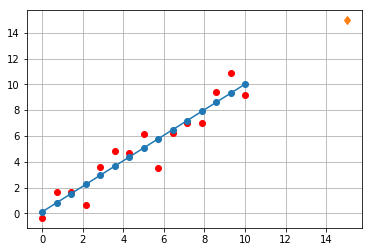

Прогнозное значение температуры: 14.97


In [10]:
Ж = 15
plt.plot(xs, ys,'ro')
plt.plot(xs, [S[1]*i+S[0] for i in xs], marker="o")
plt.plot(Ж, S[1]*Ж+S[0], marker='d')
plt.grid(True)
plt.show()
print("Прогнозное значение температуры: {:.2f}".format(S[1]*Ж+S[0]))

Оценим среднее квадратичное отклонение.

In [11]:
vErr=0
for i in range(len(xs)):
    for j in range(len(ys)):
        if i==j: vErr += (S[1]*xs[j] + S[0] - ys[j])**2
print("Среднеквадратичное отклонение: {:.2f}".format(math.sqrt(vErr)))

Среднеквадратичное отклонение: 4.09


Добавим дополнительный признак - квадрат уже имеющегося признака $x$. Для этого построим приближение в виде квадратичной функции $y(x)=Ax^2+Bx+C$

При этом функция ошибки имеет вид: $$F(A,B,C)=\sqrt{\sum_{i=1}^{n}{\left[ Ax_i^2 + Bx_i + C -y_i\right]^2}}\to \min$$.

Также как и для предыдущего примера решение задачи может быть найдено аналитически (в виде явной формулы), однако, как указано выше, этот подход не всегда эффективен. Для иллюстрации применения численных методов минимум функции найдем методом градиентного спуска. Градиентные методы основаны на том свойстве, что вектор градиента 
        $$\nabla F(x,y) = \left\{ F_x, F_y \right\}$$ 
направлен в сторону максимально быстрого роста функции. Алгоритм работы градиентного спуска:
<ul>
    <li>Выбираем точку $(x_0,y_0)$ - заданное начальное приближение</li>
    <li>Делаем шаг с заданной длиной $h$ (например $h=0.01$) в направлении вектора антиградиента (поскольку разыскиваем минимум)</li>
    <li>Оцениваем расстояние между соседними точками - если оно меньше заданной точности $\epsilon$ 
        (например, $\epsilon=0.01$), то останавливаем работу алгоритма и последнее найденное значение 
        $(x_n, y_n)$ объявляем решением.
</li>
</ul>

Реализация градиентного спуска в Python
$$
x_{n+1}=x_n - h \left. \frac{\frac{\partial F(x,y)}{\partial x}}{\left| \nabla \vec{F(x,y)}\right|} \right|_{(x_n,y_n)}
y_{n+1}=y_n - h \left. \frac{\frac{\partial F(x,y)}{\partial y}}{\left| \nabla \vec{F(x,y)}\right|} \right|_{(x_n,y_n)}
$$

In [12]:
def f(A,B,C):
    return math.sqrt(sum([(A*(i**2)+B*i+C-j)**2 for i,j in zip(xs,ys)]))

def grad_step(pf, pA, pB, pC, h):
    d=0.001
    l = math.sqrt(
        (pf(pA+d, pB  , pC  ) - pf(pA,pB,pC))**2 +
        (pf(pA  , pB+d, pC  ) - pf(pA,pB,pC))**2 +
        (pf(pA  , pB  , pC+d) - pf(pA,pB,pC))**2
    )
    rA = pA - h*((pf(pA+d, pB  , pC  ) - pf(pA,pB,pC))/l)
    rB = pB - h*((pf(pA  , pB+d, pC  ) - pf(pA,pB,pC))/l)
    rC = pC - h*((pf(pA  , pB  , pC+d) - pf(pA,pB,pC))/l)             
    return round(rA,3), round(rB,3), round(rC,3)

Применим метод градиентного спуска для отыскания коэффициентов $A$, $B$, $C$ в цикле из 10000 шагов, отобразим график функции $y(x)=Ax^2+Bx+C$ для каждого 1000-го вычисления, очевидно графики приближаются к заданным точкам.

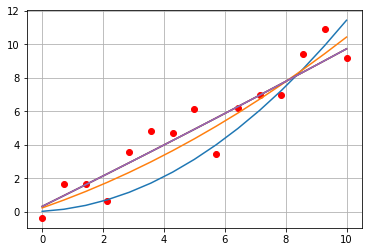

CPU times: user 250 ms, sys: 3.53 ms, total: 253 ms
Wall time: 252 ms


In [13]:
%%time
m = []
rA, rB, rC = 0, 0, 0
for _ in range(2000):
    rA, rB, rC = grad_step(f, rA, rB, rC, 0.01)
    m.append((rA, rB, rC))
plt.plot(xs,ys,'ro')
for A, B, C in m[50::400]:
    plt.plot(xs, [A*i**2+B*i+C for i in xs])
plt.grid(True)
plt.show()    

Отобразим итоговый результат и используем построенную функцию для предсказания значения при $x=5$.

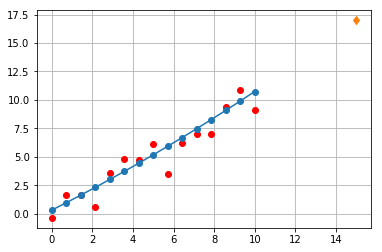

Прогнозное значение температуры: 5.19


In [14]:
Ж = 15
plt.plot(xs, ys, 'ro')
plt.plot(xs, [rA*(i**2)+rB*i+rC for i in xs], marker="o")
plt.plot(Ж, rA*(Ж**2)+rB*Ж+rC, marker='d')
plt.grid(True)
plt.show()
print("Прогнозное значение температуры: {:.2f}".format(rA*(5**2)+rB*5+rC))

Вычислим функцию ошибки.

In [15]:
vErr=0
for i in range(len(xs)):
    for j in range(len(ys)):
        if i==j: vErr+=(rA*(xs[j]**2)+rB*xs[j]+rC-ys[j])**2
print("Среднеквадратичное отклонение равно: {:.2f}".format(math.sqrt(vErr)))

Среднеквадратичное отклонение равно: 4.25


Для использования модели линейной регрессии в библиотеке sklearn есть специальная модель LinearRegression().

In [75]:
xs = df.Время.values
x_train = np.array([[i] for i in xs])
ys = df.Температура.values
linreg = LinearRegression()
linreg.fit(x_train, ys)
print(linreg.coef_, linreg.intercept_)

[0.9900869] 0.1179423146143126


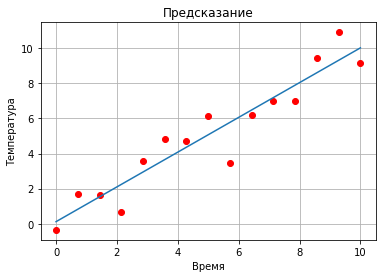

In [76]:
plt.plot(xs, ys,'ro')
plt.plot(xs, [linreg.coef_*i+linreg.intercept_ for i in xs])
plt.xlabel("Время")
plt.ylabel("Температура")
plt.title("Предсказание")
plt.grid(True)
plt.show()

Для получения приближения с использованием произведений признака $x$ (3,4,5 степеней) можно использовать функцию библиотеки sklearn.preprocessing.PolynomialFeatures. При этом можно убрать лишние признаки с помощью sklearn.linear_model.Ridge. Для объединения нескольких действий в один поток (пайплайн, pipeline) используется функция sklearn.pipeline.make_pipeline.

In [77]:
xs_test = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
r = PolynomialFeatures(3).fit_transform(xs_test)
print(r)

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


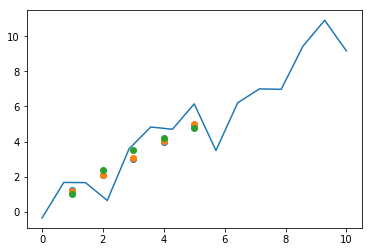

In [80]:
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(xs.reshape(-1,1), ys)
    y_plot = model.predict(np.array(xs_test).reshape(-1,1))
    plt.scatter(xs_test, y_plot)

plt.plot(xs, ys)    
plt.show()

In [40]:
xs = np.array(range(1,11)).reshape(-1,1)
ys1 = np.array([i for i in xs])
ys2 = np.array([1/i for i in xs])
ys3 = np.array([5/i for i in ys2])

linreg1 = LinearRegression()
linreg1.fit(xs, ys1)
print(linreg1.score(xs, ys1))

linreg2 = LinearRegression()
linreg2.fit(xs, ys2)
print(linreg2.score(xs, ys2))

linreg3 = LinearRegression()
linreg3.fit(xs, ys3)
print(linreg3.score(xs, ys3))

1.0
0.653883518421269
1.0


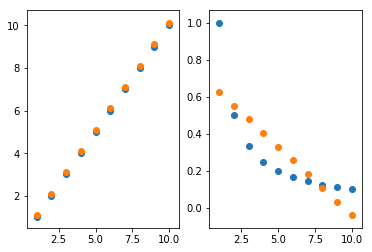

In [41]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(xs, ys1)
ax[0].scatter(xs, linreg1.predict(np.array(xs).reshape(-1,1))+0.1)
ax[1].scatter(xs, ys2)
ax[1].scatter(xs, linreg2.predict(np.array(xs).reshape(-1,1)))

plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Пример 2. Анализ стоимости квартир <a name='example2'></a>

In [26]:
from sklearn.datasets import load_boston

In [27]:
data = load_boston()

In [28]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

Данный датасет содержит информацию о стоимости квартир в Бостоне с учетом признаков (перечент признаков 'feature_names', описание можно посмотреть в 'DESCR'). Всего имеются данные о 506 квартирах.

In [30]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, shuffle=True)

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
model.score(X_test, y_test)

0.7777914192513613

In [38]:
model.predict(data.data[12].reshape(1,-1)), data.target[12]

(array([20.97445379]), 21.7)

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

https://scikit-learn.org/stable/




<a href='#toc'>Назад к Оглавлению</a>

# Задания для самостоятельной работы

1. Построить функцию линейной регрессии. Найти значение при $\alpha=20000$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
t & 0 & 100 & 150 & 200 & 250 & 300 & 360
\\
\hline
\alpha & 18179 & 18216 & 18261 & 18323 & 18403 & 18500 & 18641
\end{array}
$$

2. Построить функцию линейной регрессии. Найти значение при $S=100$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c|c}
\theta & 273 & 283 & 288 & 294 & 313 & 333 & 353 & 373
\\
\hline
S & 29,4 & 33,3 & 35,2 & 37,2 & 45,8 & 55,2 & 65,6 & 77,3
\end{array}
$$

3. Построить функцию линейной регрессии. Найти значение при $P=20$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
\nu & 3,33 & 1,63 & 0,87 & 0,43 & 0,27 & 0,17 & 0,12
\\
\hline
P & 0,48 & 1,04 & 2,03 & 4,25 & 7,16 & 11,49 & 17,59
\end{array}
$$

4. Построить функцию линейной регрессии. Найти значение при $S=1$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
V & 2,40 & 3,50 & 5,20 & 6,89 & 10,00 & 12,55 & 13,67
\\
\hline
S & 0,014 & 0,028 & 0,056 & 0,119 & 0,226 & 0,315 & 0,566
\end{array}
$$



<a href='#toc'>Назад к Оглавлению</a>

## Геометрическая интерпретация разделения на дисперсию и разброс интерпретация для двумерного случая

Для двумерного случая линейная регрессия является задачей определения «линии наилучшего соответствия» для заданного набор точек данных. Для построения линии необходимо определить $A$ и $B$. Для оценки качества приближения используется среднеквадратичное отклонение

<a href='#toc'>Назад к Оглавлению</a>